## Assignment 4: Principal Component Analysis (PCA)

Group: Group 14<br>
Name: Harjinder Singh Dhesi, Qichun Yu

### Part 1: Manual PCA versus scikit-learn

Main author: 

1. Import the pandas, numpy, and matplotlib plotting libraries and the scikit-learn PCA model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2. Load the dataset and select only the kernel features as per the previous exercises. Display the first five rows of the data.

In [2]:
df = pd.read_csv('Seed_Data.csv')
df = df[['A', 'LK']]  

#display the first five rows
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


3. Compute the covariance matrix for the data. Describe what is contained within the covariance matrix.

In [3]:
cov_matrix = np.cov(df.values.T)
cov_matrix

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

Covariance shows how one feature varies with the other feature. The covariance matrix stores the covariance between each pairing of columns. Since the data has two features 'A' and 'LK', the covariance matrix has a shape of 2 x 2. For example, the first number 8.46635078 is the covariance between column 'A' and column 'A'. 

4. What information is given by the eigenvalues and eigenvectors of the covariance matrix, and how is this useful for PCA?

Eigenvectors of the covariance matrix are a new set of basis vectors. Each eigenvector shows the amount of variability within the dataset. The eigenvalues of the covariance matrix show how important each eigenvector that is contributed to the dataset. PCA uses a covariance matrix to measure the relationship between features of the dataset. The eigenvectors tell the directions of the spread of the data. The eigenvalues indicate the relative importance of these directions. 

5. Transform the data using the scikit-learn API and only the first principal component. Store the transformed data in the sklearn_pca variable.

In [4]:
# Transform the data with only the first principal component
model = PCA(n_components=1)

# Store the transformed data in the sklearn_pca
sklearn_pca = model.fit_transform(df.values) 

6. Transform the data using the manual PCA and only the first principal component. Store the transformed data in the manual_pca variable.

In [5]:
eigenvectors, eigenvalues, _ = np.linalg.svd(cov_matrix, full_matrices=False)
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

6. Plot the sklearn_pca and manual_pca values on the same plot to visualize the difference.

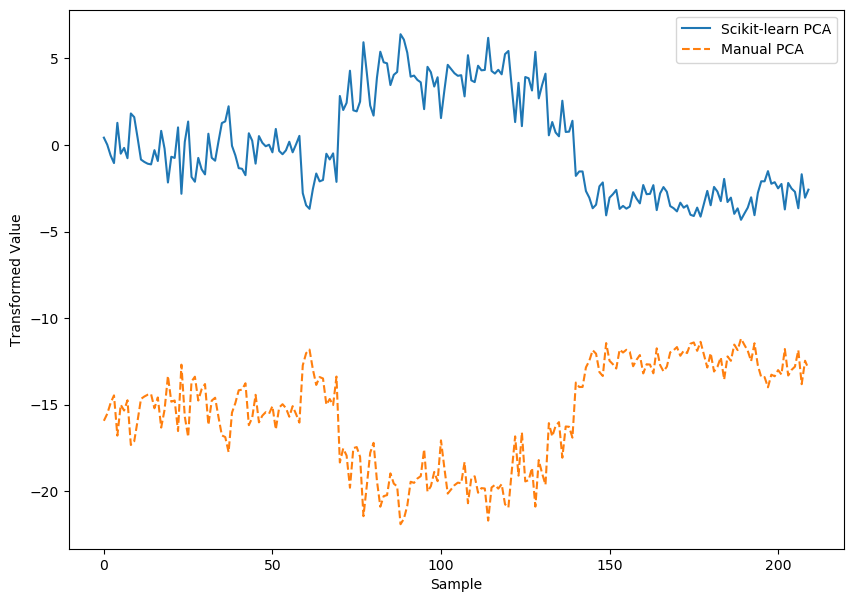

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

8. Notice that the two plots look almost identical, but with some key differences. What are these differences?

The Manual PCA is a mirror image of the Scikit-learn PCA. The transformed value of Scikit-learn PCA goes down when the transformed value of Manual PCA goes up. Moreover, there is some offset between the two. The value of Manual PCA is much lower than the Scikit-learn PCA.

9. See whether you can modify the output of the manual PCA process to bring it in line with the scikit-learn version. Plot both together to show that they now coincide.

In [7]:
# the mean of the data prior to the transform
mean = np.mean(df.values, axis=0)
print(mean)

[14.84752381  5.62853333]


In [8]:
offset_values = df.values - mean
print(offset_values[:10])

[[ 0.41247619  0.13446667]
 [ 0.03247619 -0.07453333]
 [-0.55752381 -0.33753333]
 [-1.00752381 -0.30453333]
 [ 1.29247619  0.02946667]
 [-0.46752381 -0.24253333]
 [-0.15752381 -0.06553333]
 [-0.73752381 -0.20853333]
 [ 1.78247619  0.42446667]
 [ 1.59247619  0.25546667]]


In [9]:
manual_pca = P.dot(offset_values.T)

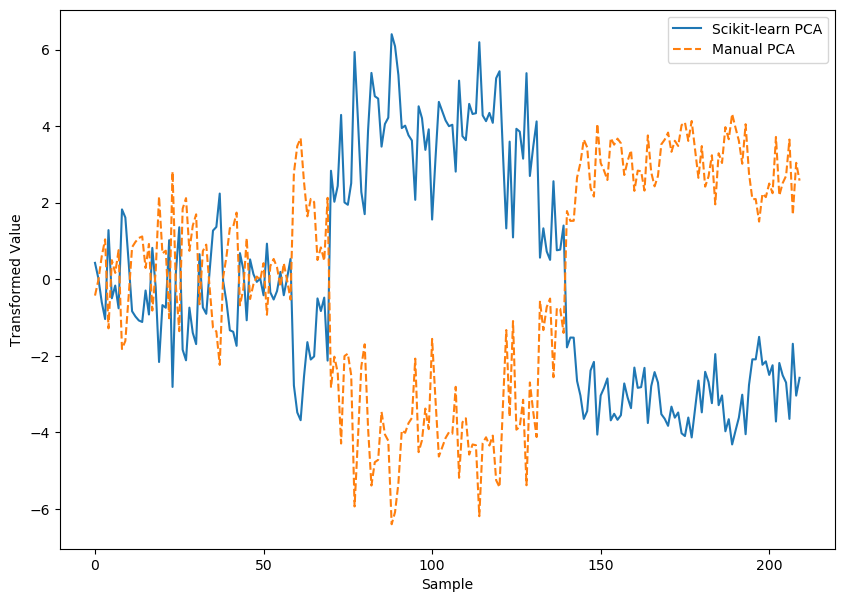

In [10]:
# replot the sklearn_pca and manual_pca
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

In [11]:
# because it is a minor image, we can multiple the manual PCA with -1
manual_pca *= -1

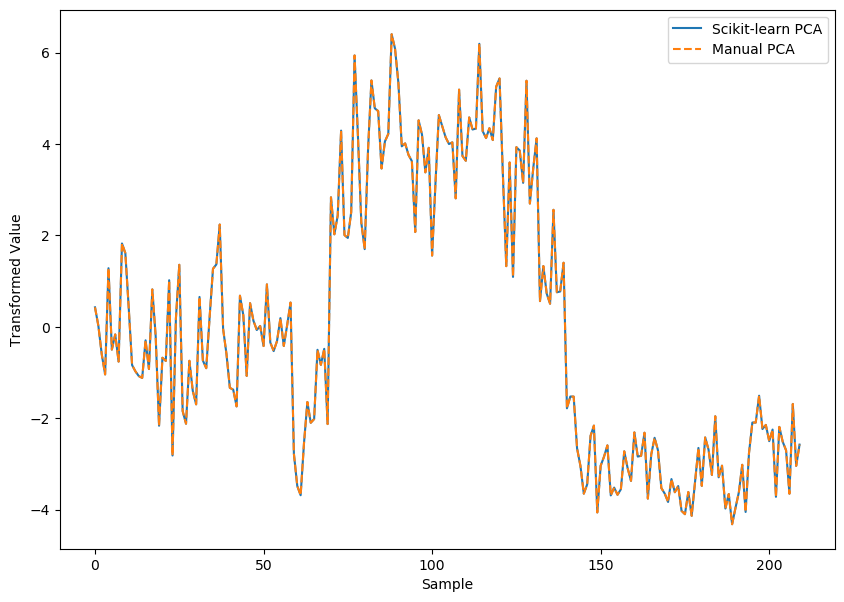

In [12]:
# replot the sklearn_pca and manual_pca
plt.figure(figsize=(10, 7))
plt.plot(sklearn_pca, label='Scikit-learn PCA')
plt.plot(manual_pca, label='Manual PCA', linestyle='--')
plt.xlabel('Sample')
plt.ylabel('Transformed Value')
plt.legend()
plt.show()

### Part 2: PCA Using the Expanded Seeds Dataset

Main author: 

1. Import pandas and matplotlib. To enable 3D plotting, you will also need to import Axes3D.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

2. Read in the dataset and select the Area of Kernel, Length of Kernel, and Compactness of Kernel columns.

In [14]:
# Read the dataset 
# Select the Area of Kernel (A), Lenghth of Kernel (LK) 
# and Compactness of kernel (C)

df = pd.read_csv('Seed_Data.csv')[['A', 'LK', 'C']]
df.head() # print the first five rows

,A,LK,C
0,15.26,5.763,0.8710
1,14.88,5.554,0.8811
2,14.29,5.291,0.9050
3,13.84,5.324,0.8955
4,16.14,5.658,0.9034


3. Plot the data in three dimensions. What do you see?

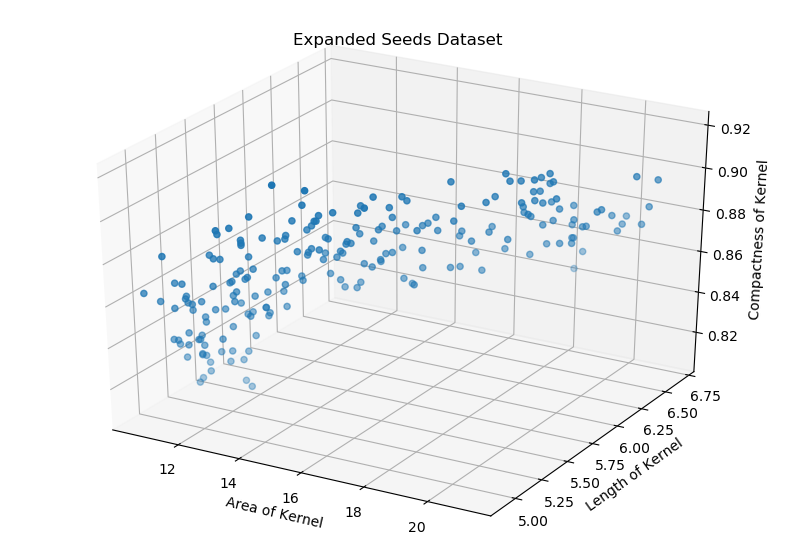

In [15]:
fig = plt.figure(figsize=(10, 7))
# Where Axes3D is required
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'])
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')
plt.show()

The 3D plot shows the relationship between the Area of Kernel, the Length of Kernel, and the Compactness of Kernel. From the graph, we can see that the Area of Kernel looks like a positive relationship with the Length of Kernel or Compactness of Kernel. The length of Kernel and the compactness of Kernel are increasing with the area of kernel. 

4. Create a PCA model without specifying the number of components.

In [16]:
model = PCA()

5. Fit the model to the dataset.

In [17]:
model.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

6. Display the eigenvalues and the explained_variance_ratio_. Describe how the explained variance ratio is calculated and explain what it means.

In [18]:
model.explained_variance_ratio_

array([9.97794495e-01, 2.19418709e-03, 1.13183333e-05])

In [19]:
np.round(model.explained_variance_ratio_, 4)

array([0.9978, 0.0022, 0.    ])

In [20]:
np.round(model.explained_variance_,2)

array([8.64, 0.02, 0.  ])

In [21]:
# Display the eigenvectors
model.components_

array([[ 0.98964224,  0.14347367,  0.00485241],
       [-0.14193838,  0.98299322, -0.11652393],
       [ 0.021488  , -0.11462826, -0.99317603]])

In [22]:
model.singular_values_

array([42.50433495,  1.99319368,  0.14315414])

The explained variance ratio is the percentage of the explained variance. The explained variance ratio = the explained variance / the total of explained variance. As We can see that the first component of the explained variance ratio is 0.9978, which is equal to 8.64 / (8.64+0.02+0). The explained variance is the amount of variance explained by each of the selected components. 

7. We want to reduce the dimensionality of the dataset but still keep at least 90% of the variance. What is the minimum number of components required to keep 90% of the variance?

The first component has an explained variance ratio of 0.9978, which provides 99.78% of the variance within the dataset. Therefore, only the first component is required to keep at least a 90% of the variance. 

8. Create a new PCA model, this time specifying the number of components required to keep at least 90% of the variance.

In [23]:
model = PCA(n_components=1)

9. Transform the data using the new model.

In [24]:
data_transformed = model.fit_transform(df.values)

10. Plot the transformed data. Describe what you see.

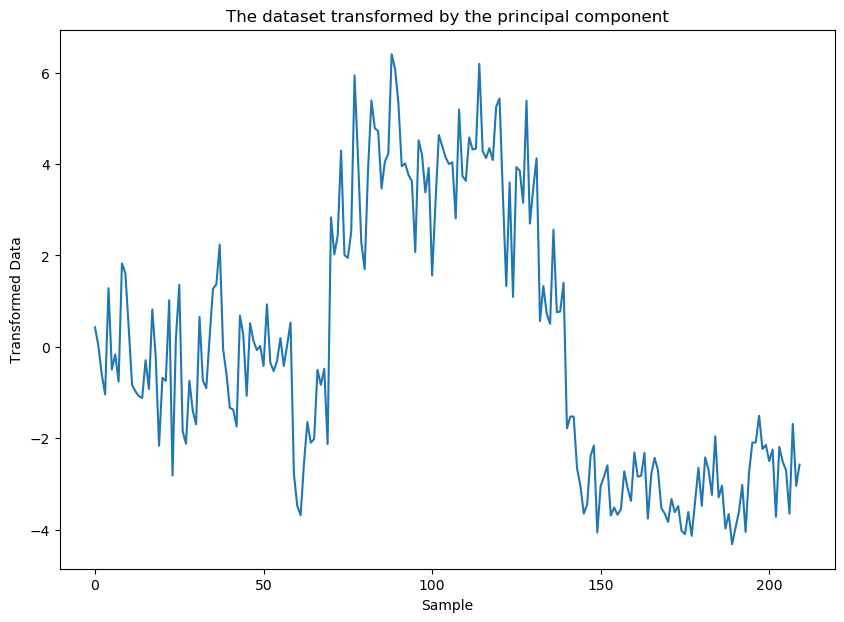

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(data_transformed)
plt.xlabel('Sample')
plt.ylabel('Transformed Data')
plt.title('The dataset transformed by the principal component')
plt.show()

The transformed data are between -4 to 2 with the first 70 samples. However, the transformed data value goes up and is between 2 to 6 when the sample is in the range of 70 to 140. The transformed data value is between -4 to -2 when the sample index is higher than 140. 

11. Restore the transformed data to the original dataspace.

In [26]:
data_restored = model.inverse_transform(data_transformed)

12. Plot the restored data in three dimensions in one subplot and the original data in a second subplot to visualize the effect of removing some of the variance. Describe what you see. 

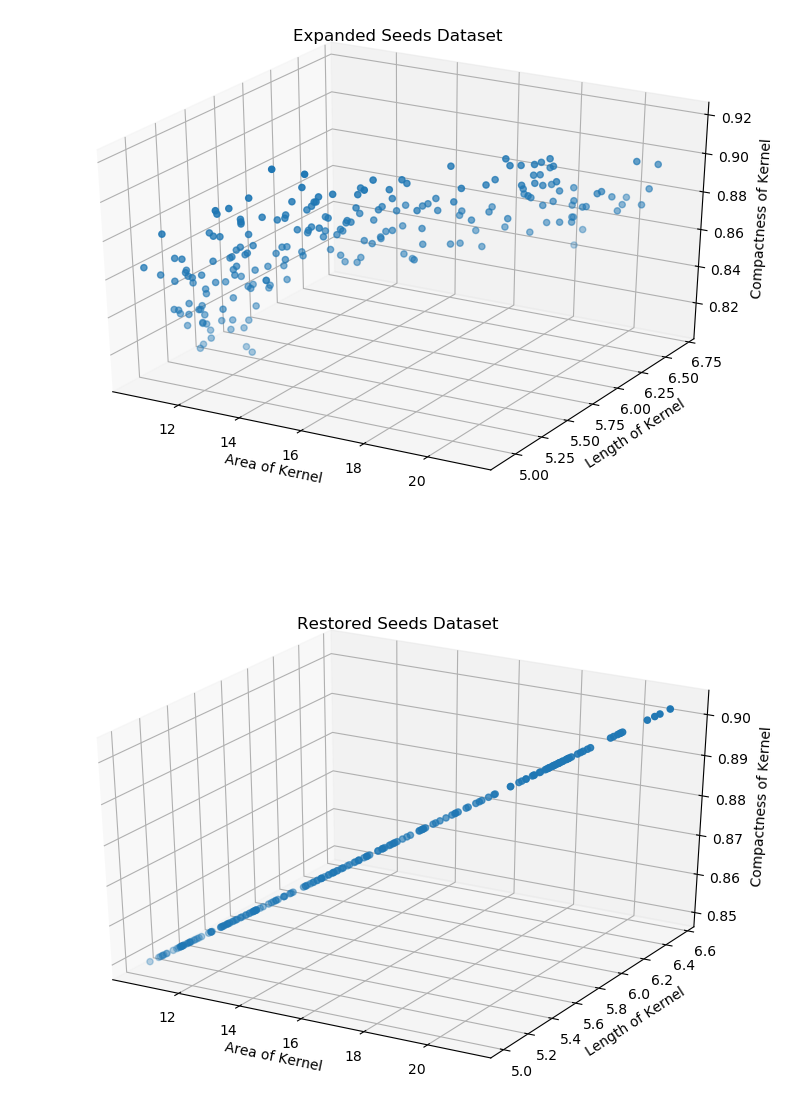

In [29]:
fig = plt.figure(figsize=(10, 14))

# Plot the Original Data
ax = fig.add_subplot(211, projection='3d')
ax.scatter(df['A'], df['LK'], df['C'], label='Original Data');
ax.set_xlabel('Area of Kernel');
ax.set_ylabel('Length of Kernel');
ax.set_zlabel('Compactness of Kernel');
ax.set_title('Expanded Seeds Dataset');

# Plot the Transformed Data
ax = fig.add_subplot(212, projection='3d')
ax.scatter(data_restored[:,0], data_restored[:,1], data_restored[:,2], label='Restored Data');
ax.set_xlabel('Area of Kernel');
ax.set_ylabel('Length of Kernel');
ax.set_zlabel('Compactness of Kernel');
ax.set_title('Restored Seeds Dataset');

plt.show()

From the plot above, the restored data is like a positive line that crosses over the 3D plot from the bottom left to the top right. The noise of the data have removed and the most important information is retained. The length of Kernel and the compactness of Kernel are increasing with the area of kernel.